# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid

**I) This Notebook prepares the tweets for the text analysis and contains**:

**1. Preprocessing of tweets - data cleaning:**
- Prepare a preprocessed and clean `tweets` column for text analysis

**2. Descriptive: word frequencies**:
- Top 25 words with and without stop-words
- Wordclouds with and without stop-words
- Wordtrees
- Chi-squared (word co-occurence - used to identify words that are co-located)
- TF-IDF 

**3. Tokenization**:
- Method 1: Word split using NLTK
- Method 2: Sentiment analysis
- Method 3: Deepmoji analysis 

**II) This notebook also contains:**

**4. Topic modeling of tweets**
- Method 1: Simple topic models: Non-Negative Matrix Factorization (NMF)
- Method 2: LDA
- Method 3: hSBM model

In [1]:
import os
import requests
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from collections import Counter
plt.style.use('ggplot')
import datetime
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import NMF
# NLTK 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import bigrams 
# textblob
from textblob import TextBlob # pip install -U textblob
# LDA with Gensim
import gensim
from gensim import corpora
import pickle
# Functions
from our_functions import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jtz169\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jtz169\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
C:\Users\jtz169\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Data import:** 
- Dataset is downloaded from Kaggle (https://www.kaggle.com/fifthtribe/how-isis-uses-twitter)

In [2]:
data = read_tweets('tweets_1.csv')
data

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True


In [3]:
# Overview on all tweets (to see what needs to be cleaned):
terms_single = set(data['tweets'])
terms_single

{'RT @anaksabil79: Bismillahir Rahmanir Raheem.. \nAssalamo alaykom.. I told you people I shall return!!! 😛😐😎 https://t.co/tyVg427f42',
 '#KhilafahNews (16th January 2016) in #French Language\n\nMP3 - PDF - Docx\nhttps://t.co/x2Qbs0MFFP\n\n#FrenchTech #frenchcurves #frenchleather',
 '@ozwitness barak ALLAH fik Akhi wa Alaikom al salam wa rahmat ALLAH wa barakatu',
 'https://t.co/Fl8109xqgH',
 'https://t.co/ln0cpxS85b #ISIS  makes video #games must see.',
 'RT @erhabii41: #Syria - Baby merged with sand &amp; rocks after #Russia/#Assad airstrikes destroyed the #Sarmada Refugee Camp... https://t.co/G…',
 'RT @green_lemonnn: #Syria Exclusive pic of an #IRIAF C-130 in Damascus IA transporting IRGC &amp; Badr fighters to Aleppo front. Nov 2015 https…',
 '@BTelawy @oryxspioenkop \n\nnote:\n\nGreen: 21 SSG\nMaroon: 10th Para\n\nsource: wikipedia',
 'Reports \n#Iranian Special forces+ All the Shia Militias in South Aleppo have arrived in tadmur front to try to liberate #Palmyra',
 'PHOTO: Pilot

**1.Preprocessing**: Takes care of the following parts of the tweets:
- References: `@`
- Retweets: `RT`
- Hashtags to topics: `#`
- Links: `http\`

**STEP 1 Preprocessing **

In [4]:
# TO-DO What is about the \n??
# How to reasonable delete non-word characters?

# Create a new coloumn for preprocessed tweets
def extract_from_to_column(data, regex, from_col, to_col):
    data[to_col]=data[from_col].apply(lambda x: " ".join(regex.findall(x)))
    return data

def remove_from_body(data,regex):
    data['tweets_prepr']=data.tweets.apply(lambda x: re.sub(regex,'',x))
    return data

regex1 = re.compile("@(\S+)")   # tagged users
regex2 = re.compile("http\S+")  # urls
regex3 = re.compile("ENGLISH TRANS[^:]*:") # prefix
regex4 = re.compile("#(\S+)") # hashtags
regex5 = re.compile("RT\s") # retweets

data = extract_from_to_column(data, regex1, 'tweets', 'tags')
data = remove_from_body(data, regex1)

data = extract_from_to_column(data, regex2, 'tweets', 'links')
data = remove_from_body(data, regex2)

data = remove_from_body(data, regex3)

data = extract_from_to_column(data, regex4, 'tweets', 'hashtag')
data = remove_from_body(data, regex4)

data = extract_from_to_column(data, regex5, 'tweets', 'retweets')
data = remove_from_body(data, regex5)

data.tags = data.tags.str.split()
data.head(1000)

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,tweets_prepr,links,hashtag,retweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,http://t.co/2EYm9EymTe,,
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True,[],OH MURABIT! : http://t.co/hujLj9KGkG http://t...,http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",Aslm Please share our new account after the pr...,,,
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True,[],AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX,,


In [5]:
data['tweets_prepr'].head()

0     'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...
1     SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...
4     AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...
Name: tweets_prepr, dtype: object

**STEP 2 Preprocessing **

In [6]:
# Remove punctuations and additional signs in tweets_prepr column
data['tweets_prepr'] = data['tweets_prepr'].str.replace('[^\w\s]','')
data['tweets_prepr'].head()

0     A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH AB...
1     SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INT...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP TH...
4     AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT A...
Name: tweets_prepr, dtype: object

**STEP 3 Preprocessing **

In [7]:
# Spelling corrections with textblob library
data['tweets_prepr'][:5].apply(lambda x: str(TextBlob(x).correct()))
data['tweets_prepr'].head()

0     A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH AB...
1     SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INT...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP TH...
4     AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT A...
Name: tweets_prepr, dtype: object

**STEP 4 Preprocessing **

In [8]:
# Stemm the words
# THIS RUNS SUPER SLOW - can someone else try?
#stemming = PorterStemmer()
#data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([stemming.stem(word) for word in data.tweets_prepr]))
#data['tweets_prepr'].head()

In [9]:
# ALTERNATIVE
#NLTK provides several stemmer interfaces like Porter stemmer, #Lancaster Stemmer, Snowball Stemmer
#porter = PorterStemmer()
#stems = []
#for t in tweets_stop:    
#    stems.append(porter.stem(t))
#print(stems)
# IF we use this method, it needs to be added to the dataframe afterwards

**STEP 5 Preprocessing **

In [10]:
# lower capitalization
data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
data['tweets_prepr'].head()

0    a message to the truthful in syria sheikh abu ...
1    sheikh fatih al jawlani for the people of inte...
2    first audio meeting with sheikh fatih al jawla...
3    sheikh nasir al wuhayshi ha leader of aqap the...
4    aqap response to sheikh baghdadis statement al...
Name: tweets_prepr, dtype: object

**STEP 6 Preprocessing **

In [11]:
# Removing stop-words: Create new column in data - without stopwords
stop = stopwords.words('english')

data['tweets_prepr_stop'] = data['tweets_prepr'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed al ...
1    sheikh fatih al jawlani people integrity sacri...
2    first audio meeting sheikh fatih al jawlani ha...
3    sheikh nasir al wuhayshi ha leader aqap promis...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**STEP 7 Preprocessing **

In [12]:
# Remove words less than three letters
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed maq...
1    sheikh fatih jawlani people integrity sacrific...
2    first audio meeting sheikh fatih jawlani httpt...
3    sheikh nasir wuhayshi leader aqap promise vict...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**STEP 8 Preprocessing **

In [13]:
# lemmatize
lmtzr = WordNetLemmatizer()
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([lmtzr.lemmatize(word) for word in x.split()]))
data['tweets_prepr_stop'].head()

0    message truthful syria sheikh abu muhammed maq...
1    sheikh fatih jawlani people integrity sacrific...
2    first audio meeting sheikh fatih jawlani httpt...
3    sheikh nasir wuhayshi leader aqap promise vict...
4    aqap response sheikh baghdadis statement altho...
Name: tweets_prepr_stop, dtype: object

**2. Descriptive: Word Frequencies**

**Word frequencies **

In [14]:
# get most common words (original column)
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('the', 7452),
 ('in', 6612),
 ('of', 5929),
 ('rt', 5851),
 ('to', 4202),
 ('and', 3424),
 ('a', 2967),
 ('is', 2759),
 ('on', 1735),
 ('by', 1695),
 ('for', 1518),
 ('#isis', 1488),
 ('with', 1363),
 ('&amp;', 1352),
 ('from', 1283),
 ('are', 1227),
 ('you', 1218),
 ('killed', 1185),
 ('they', 1139),
 ('#syria', 1059),
 ('that', 967),
 ('this', 943),
 ('army', 849),
 ('it', 800),
 ('was', 763)]

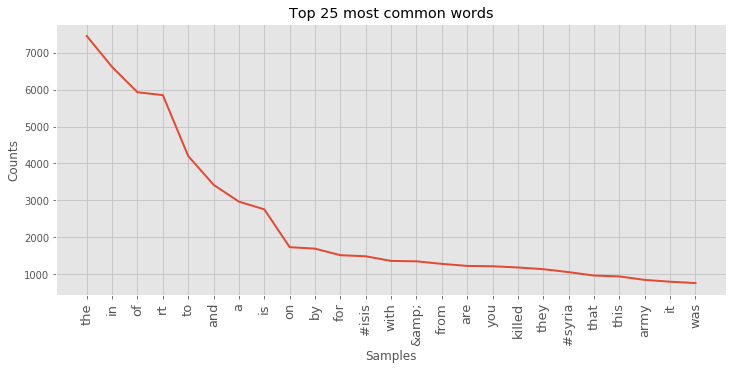

Text(0.5, 1.0, 'log-log plot of words frequency')

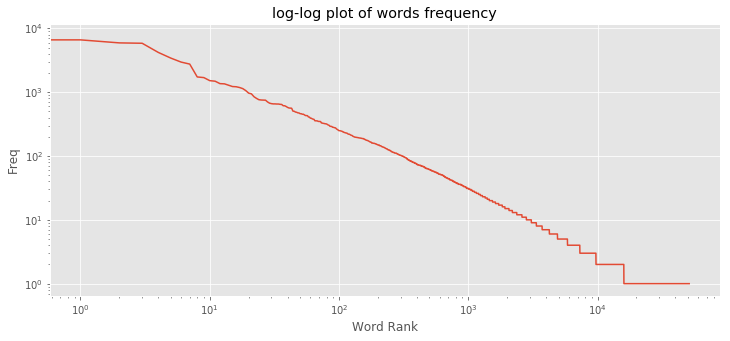

In [15]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

**Note**:
- The word distribution present in this data dictionary is a very common phenomenon in large samples of words as shown by Zipf’s law where the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. (see: https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb)

In [16]:
# get most common words (preprocessed tweet column)
all_words = []
for line in list(data['tweets_prepr_stop']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('isi', 2382),
 ('syria', 1541),
 ('amp', 1359),
 ('killed', 1293),
 ('army', 940),
 ('http', 914),
 ('state', 723),
 ('attack', 696),
 ('islamic', 687),
 ('aleppo', 646),
 ('iraq', 642),
 ('soldier', 632),
 ('syrian', 613),
 ('allah', 610),
 ('assad', 587),
 ('today', 580),
 ('ramiallolah', 578),
 ('force', 576),
 ('near', 575),
 ('iraqi', 572),
 ('breaking', 559),
 ('muslim', 556),
 ('city', 497),
 ('one', 477),
 ('fighter', 451)]

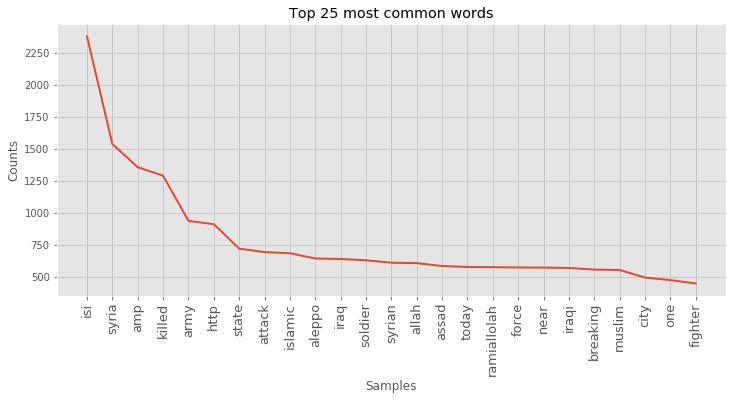

In [17]:
# plot word frequency distribution of first few words after preprocessing
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

**Wordclouds **

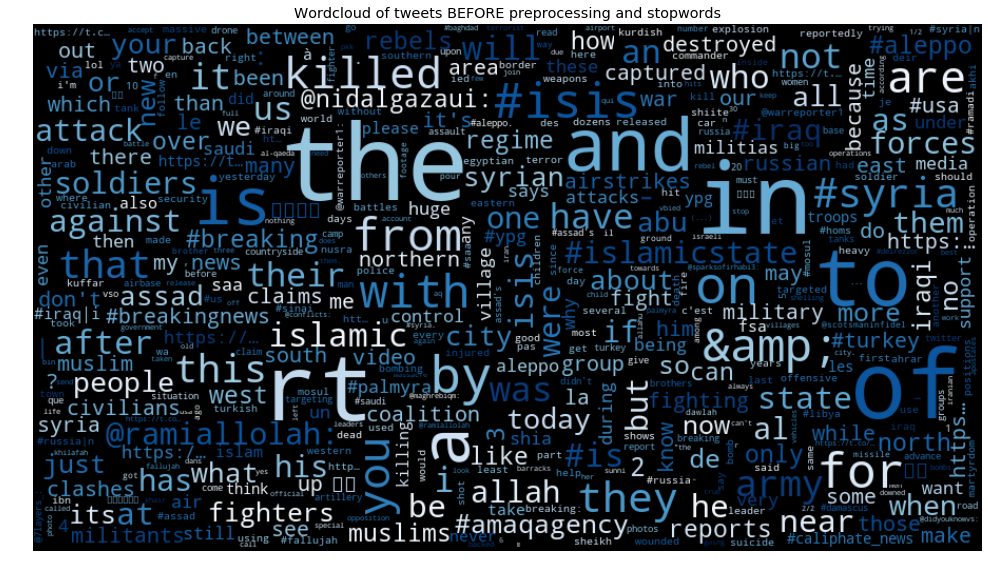

In [18]:
# get most common words (original column)
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets BEFORE preprocessing and stopwords")
plt.show()

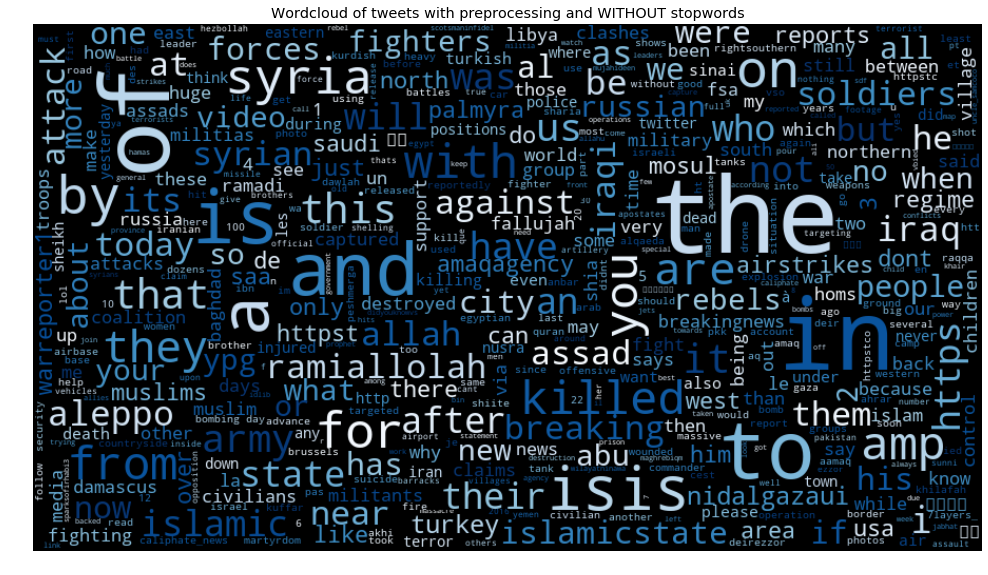

In [19]:
# get most common words (original column)
all_words = []
for line in list(data['tweets_prepr']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets with preprocessing and WITHOUT stopwords")
plt.show()

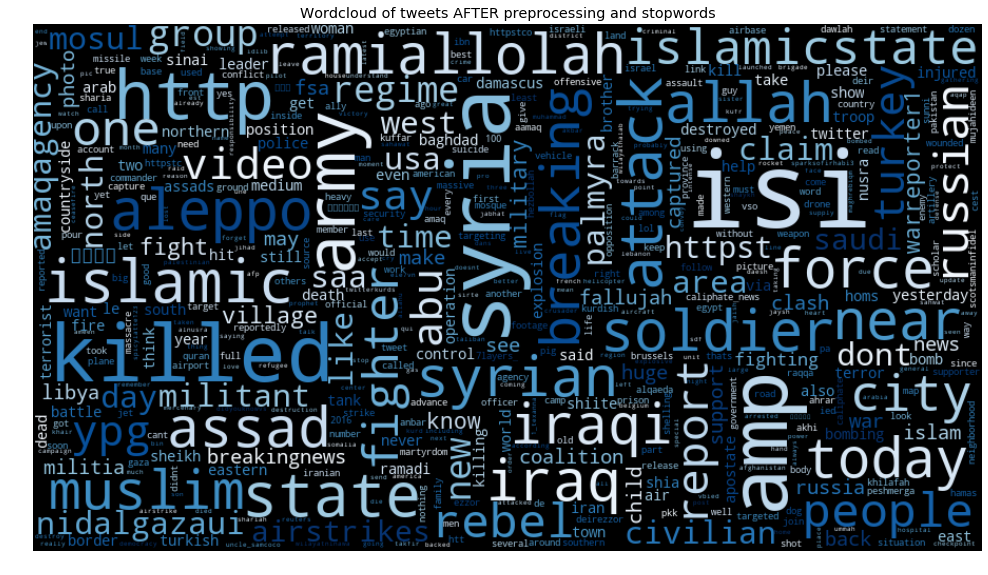

In [24]:
# get most common words (original column)
all_words = []
for line in list(data['tweets_prepr_stop']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of tweets AFTER preprocessing and stopwords")
plt.show()

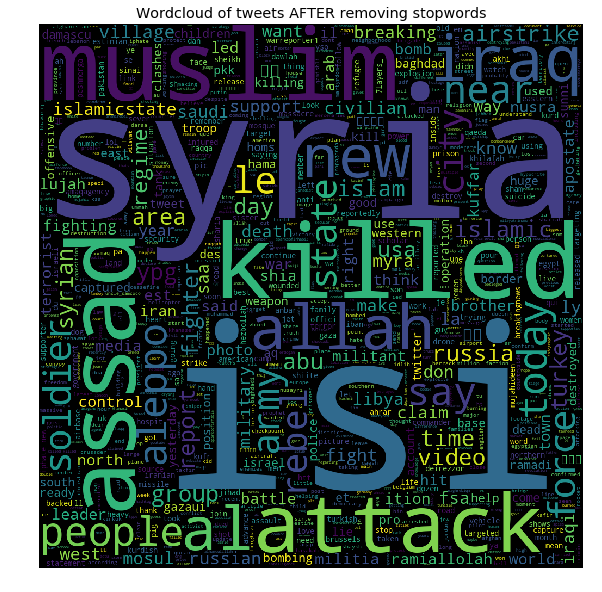

In [25]:
# THIS WORDCLOUD USES TF-IDF VECTORIZER

# remove junk from tweets
junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
tweets = [junk.sub(" ", t) for t in data.tweets]

# remove stop words from tweets
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfv = vec.fit_transform(tweets)

terms = vec.get_feature_names()
wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of tweets AFTER removing stopwords")
plt.show()

**Wordtrees **

In [22]:
# TBD - how do we do that?

**Term co-occurence: Chi-squared **

In [26]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

NameError: name 'tweets_nsw_nc' is not defined

**TF-IDF:** In the next part, I played around with the data following guidance from this blogpost online: https://sigdelta.com/blog/text-analysis-in-pandas/, which uses a TF-IDF method to analyze the frequency of words

Some notes/explanations on TF-IDF: https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3

- Term Frequency — Inverse Data Frequency
- **Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.
- **Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below
- **TF-IDF**: Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf

In [27]:
# Tokenize sentences into words: split into words
data['tweets_tfidf'] = data.tweets_prepr.str.strip().str.split('[\W_]+')
data['tweets_tfidf'].head()

0    [a, message, to, the, truthful, in, syria, she...
1    [sheikh, fatih, al, jawlani, for, the, people,...
2    [first, audio, meeting, with, sheikh, fatih, a...
3    [sheikh, nasir, al, wuhayshi, ha, leader, of, ...
4    [aqap, response, to, sheikh, baghdadis, statem...
Name: tweets_tfidf, dtype: object

In [28]:
# Break words into different rows, by username
rows = list()
for row in data[['username', 'tweets_tfidf']].iterrows():
    r = row[1]
    for word in r.tweets_tfidf:
        rows.append((r.username, word))

tweets_words = pd.DataFrame(rows, columns=['username', 'word'])
tweets_words.head()

,username,word
0,GunsandCoffee70,a
1,GunsandCoffee70,message
2,GunsandCoffee70,to
3,GunsandCoffee70,the
4,GunsandCoffee70,truthful


In [29]:
# Removing empty cells
tweets_words = tweets_words[tweets_words.word.str.len() > 0]
tweets_words.head()

,username,word
0,GunsandCoffee70,a
1,GunsandCoffee70,message
2,GunsandCoffee70,to
3,GunsandCoffee70,the
4,GunsandCoffee70,truthful


In [30]:
# Regroups by username
counts = tweets_words.groupby('username')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
username  word           
04_8_1437 amaqagency   43
          of           29
          islamic      20
          state        20
          in           19

n_w
username     word             
04_8_1437    amaqagency     43
             of             29
             islamic        20
             state          20
             in             19
06230550_IS  the            51
             of             30
             a              15
             is             13
             and            12
1515Ummah    the            50
             in             45
             of             35
             isis           33
             is             25
1Dawlah_III  of            110
             the            95
             in             73
             city           33
             a              27
432Mryam     you            19
             khair          14
             upp0rt         14
             jazakallah     13
             the            12
ALK___226    دعم            12
             أعماق           7
             وكالة           7
             amaqagency      6
             of              6
...                        ...
war_analysis the            40
             in             38
             of             31
             to             28
             is             25
warreporter2 the           145
             of             88
             didyouknowvs   71
             in             65
             to             60
warrnews     in            652
             of            314
             the           298
             to            223
             and           216
wayf44rerr   of            142
             in            129
             and           102
             the            88
             by             87
wayff44rer   of             10
             the            10
             and             5
             egyptian        4
             explosion       4
wayyf44rer   in             29
             of             28
             and            17
             by             17
             the            17

[560 rows x 1 columns]

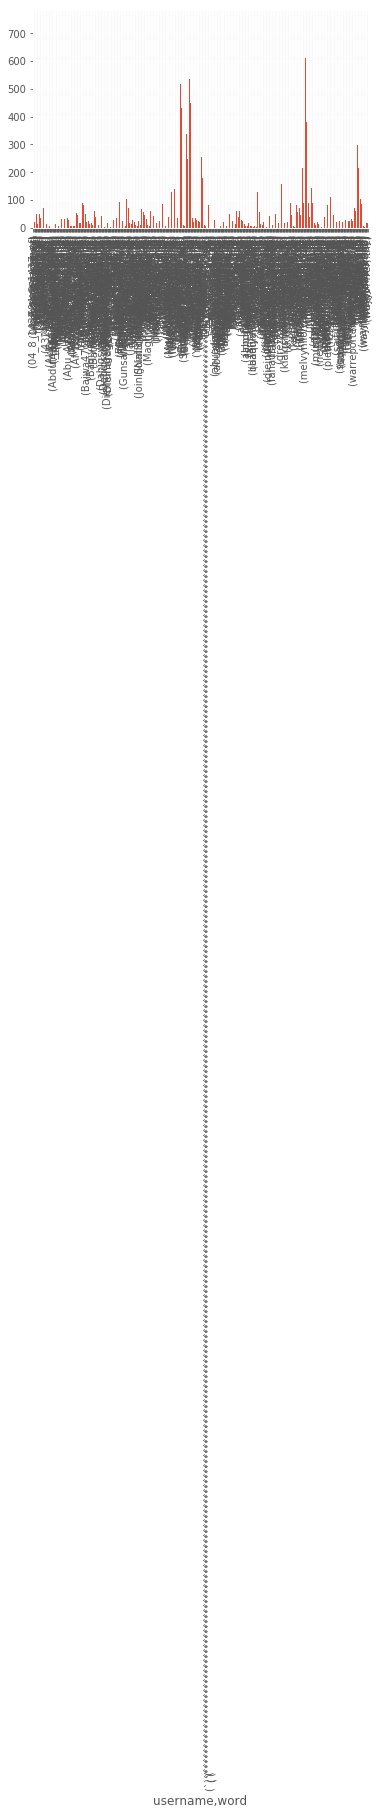

In [31]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

In [32]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
username,
04_8_1437,781
06230550_IS,1007
1515Ummah,1494
1Dawlah_III,1208
432Mryam,541
ALK___226,376
Abdul__05,15
AbdusMujahid149,504
AbuLaythAlHindi,181


In [33]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()

n_w  n_d        tf
username  word                          
04_8_1437 amaqagency   43  781  0.055058
          of           29  781  0.037132
          islamic      20  781  0.025608
          state        20  781  0.025608
          in           19  781  0.024328

tf
username     word                  
04_8_1437    amaqagency    0.055058
             of            0.037132
             islamic       0.025608
             state         0.025608
             in            0.024328
06230550_IS  the           0.050645
             of            0.029791
             a             0.014896
             is            0.012910
             and           0.011917
1515Ummah    the           0.033467
             in            0.030120
             of            0.023427
             isis          0.022088
             is            0.016734
1Dawlah_III  of            0.091060
             the           0.078642
             in            0.060430
             city          0.027318
             a             0.022351
432Mryam     you           0.035120
             khair         0.025878
             upp0rt        0.025878
             jazakallah    0.024030
             the           0.022181
ALK___226    دعم           0.031915
             أعماق         0.018617
             وكالة         0.018617
             amaqagency    0.015957
             of            0.015957
...                             ...
war_analysis the           0.026525
             in            0.025199
             of            0.020557
             to            0.018568
             is            0.016578
warreporter2 the           0.046549
             of            0.028250
             didyouknowvs  0.022793
             in            0.020867
             to            0.019262
warrnews     in            0.039199
             of            0.018878
             the           0.017916
             to            0.013407
             and           0.012986
wayf44rerr   of            0.026098
             in            0.023709
             and           0.018747
             the           0.016173
             by            0.015990
wayff44rer   of            0.051020
             the           0.051020
             and           0.025510
             egyptian      0.020408
             explosion     0.020408
wayyf44rer   in            0.032222
             of            0.031111
             and           0.018889
             by            0.018889
             the           0.018889

[560 rows x 1 columns]

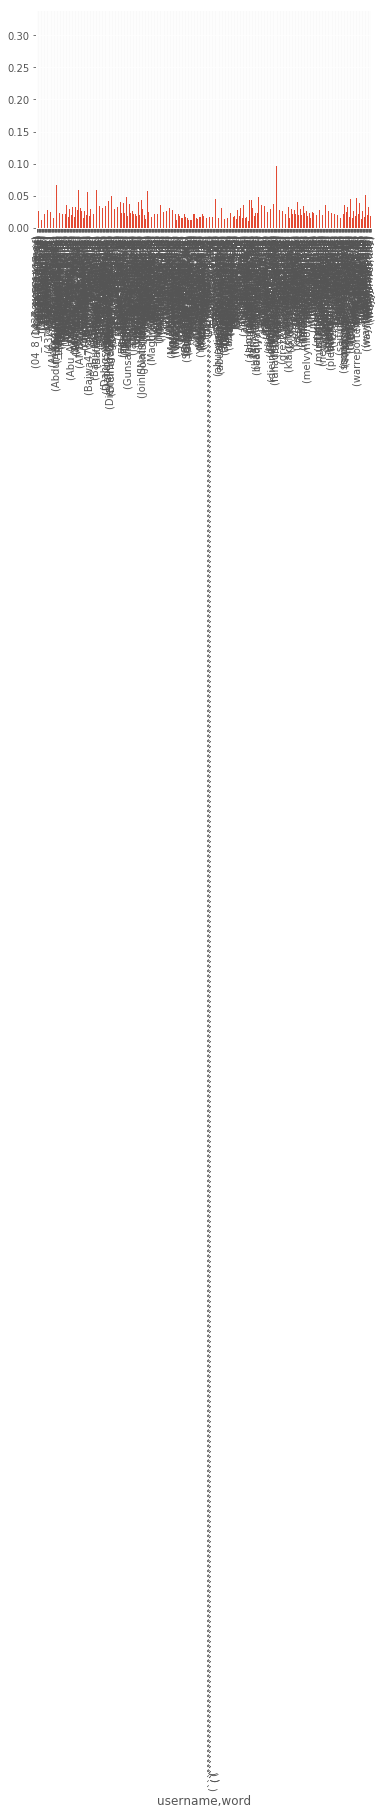

In [34]:
# We should do this only for the most important users
pretty_plot_top_n(tf['tf'])

In [41]:
c_d = tweets_words.username.nunique()
c_d

112

In [42]:
idf = tweets_words.groupby('word')\
    .username\
    .nunique()\
    .to_frame()\
    .rename(columns={'username':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
httpstcozry1ahnvro,1
malcolmitei,1
malaysia,1
malahan,1
maladroit,1


In [43]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
httpstcozry1ahnvro,1,4.718499
malcolmitei,1,4.718499
malaysia,1,4.718499
malahan,1,4.718499
maladroit,1,4.718499


In [44]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w  n_d        tf  i_d       idf
username  word                                         
04_8_1437 amaqagency   43  781  0.055058   36  1.134980
          of           29  781  0.037132  108  0.036368
          islamic      20  781  0.025608   89  0.229863
          state        20  781  0.025608   85  0.275848
          in           19  781  0.024328  109  0.027151

In [45]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
username  word                                                   
04_8_1437 amaqagency   43  781  0.055058   36  1.134980  0.062489
          of           29  781  0.037132  108  0.036368  0.001350
          islamic      20  781  0.025608   89  0.229863  0.005886
          state        20  781  0.025608   85  0.275848  0.007064
          in           19  781  0.024328  109  0.027151  0.000661

tf_idf
username     word                      
04_8_1437    amaqagency        0.062489
             khilafahnews      0.021300
             rigged            0.017066
             1437              0.016545
             04                0.015462
06230550_IS  loool             0.009927
             35million         0.009371
             afghanrace        0.009371
             maslahat          0.009371
             preaches          0.009371
1515Ummah    malle111elf       0.037721
             wayf44rer         0.012937
             lililllililli     0.012633
             ankara            0.009420
             albarida          0.008083
1Dawlah_III  wilayataljazirah  0.018016
             wilayatninawa     0.016643
             wilayatalbarakah  0.014983
             wilayatarraqqah   0.014610
             wilayatdimashq    0.014537
432Mryam     upp0rt            0.104168
             blvrnasiha        0.087218
             jazakallah        0.043929
             ukhti             0.041944
             khair             0.039864
ALK___226    دعم               0.115528
             وكالة             0.040093
             أعماق             0.038713
             اخي               0.033075
             خيرا              0.031136
...                                 ...
war_analysis maghrebiwt        0.013375
             shamibritaani     0.012516
             adamhasakah112    0.009387
             khorasan15        0.009387
             nidalgazaui       0.008914
warreporter2 didyouknowvs      0.082508
             thevictoryseri4   0.038767
             revelations       0.011630
             victorynewshd     0.010459
             did               0.009527
warrnews     nidalgazaui       0.013518
             gaza              0.009001
             hamas             0.008729
             warnews24         0.007018
             alqassam          0.005658
wayf44rerr   zuwaid            0.014698
             mozlemgurl        0.014086
             sinai             0.012665
             egyptian          0.008692
             rafahh            0.008574
wayff44rer   rafahh            0.051003
             searcherv         0.041075
             explosion         0.033213
             assukhna          0.031725
             foot              0.028292
wayyf44rer   alqaryatayn       0.016260
             gthe              0.015728
             kyrgyzstan        0.015728
             zuwaid            0.014810
             wwayyf44rer       0.011206

[560 rows x 1 columns]

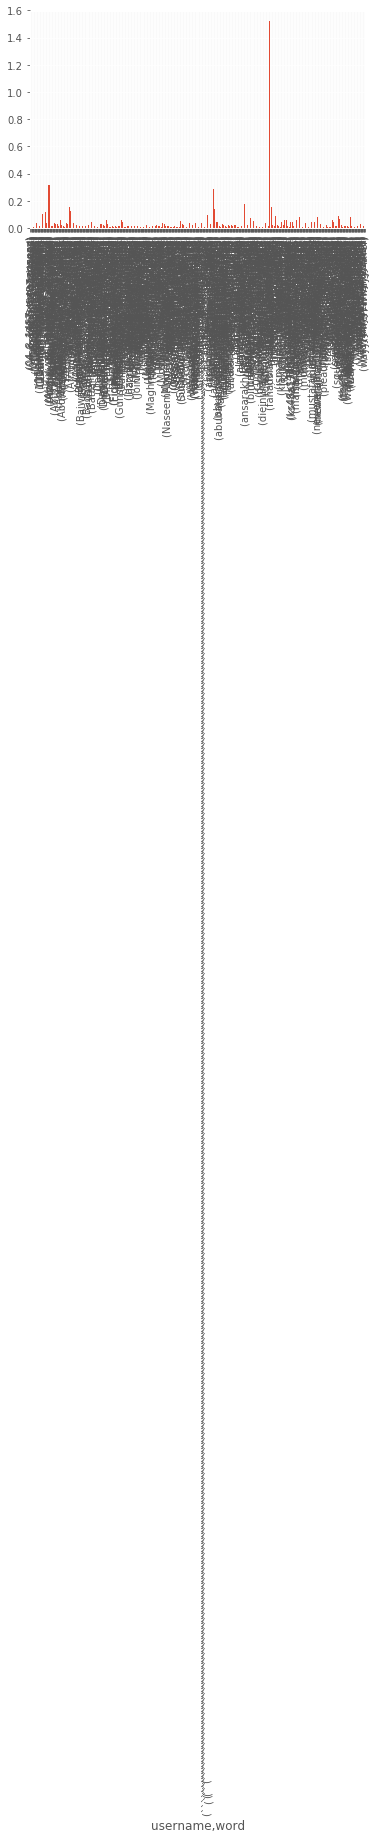

In [46]:
# We should do this only for the most important users
pretty_plot_top_n(tf_idf['tf_idf'])

**3. Tokenization**:
- Word split
- Sentiment analysis
- Deepmoji

**Word split **

In [47]:
# Version 1.1 Tokenization Split: Tokenize sentences into words: split into words
data['tweets_tok1'] = data.tweets_prepr.str.strip().str.split('[\W_]+')
data['tweets_tok1'].head()

0    [a, message, to, the, truthful, in, syria, she...
1    [sheikh, fatih, al, jawlani, for, the, people,...
2    [first, audio, meeting, with, sheikh, fatih, a...
3    [sheikh, nasir, al, wuhayshi, ha, leader, of, ...
4    [aqap, response, to, sheikh, baghdadis, statem...
Name: tweets_tok1, dtype: object

In [48]:
# Version 1.2 Tokenization NLTK1: Tokenize sentences into words: split into words
tweet_tokenizer = nltk.tokenize.casual.TweetTokenizer()
data['tweets_tok2'] = data['tweets_prepr'].apply(tweet_tokenizer.tokenize)
data['tweets_tok2'].head()

0    [a, message, to, the, truthful, in, syria, she...
1    [sheikh, fatih, al, jawlani, for, the, people,...
2    [first, audio, meeting, with, sheikh, fatih, a...
3    [sheikh, nasir, al, wuhayshi, ha, leader, of, ...
4    [aqap, response, to, sheikh, baghdadis, statem...
Name: tweets_tok2, dtype: object

**Sentiment analysis **
- The package `textblob` can also be used for sentiment analysis: returns the polarity of a string. The polarity is a float between -1 and 1, -1 being absolutely negative and 1 being absolutely positive. Neutral tweets will be close to 0. 
- For reference, check here: https://medium.com/@tomham000/world-cup-final-2018-twitter-analysis-in-python-2be24e116d59

In [58]:
def get_polarity(s):
     return TextBlob(s).sentiment.polarity
    
data['polarity'] = data['tweets'].apply(get_polarity)

data['polarity'].head()
@data

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,tweets_prepr,links,hashtag,retweets,tweets_prepr_stop,tweets_tfidf,tweets_tok1,tweets_tok2,polarity
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],a message to the truthful in syria sheikh abu ...,http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,,message truthful syria sheikh abu muhammed maq...,"[a, message, to, the, truthful, in, syria, she...","[a, message, to, the, truthful, in, syria, she...","[a, message, to, the, truthful, in, syria, she...",0.500000
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],sheikh fatih al jawlani for the people of inte...,http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,,sheikh fatih jawlani people integrity sacrific...,"[sheikh, fatih, al, jawlani, for, the, people,...","[sheikh, fatih, al, jawlani, for, the, people,...","[sheikh, fatih, al, jawlani, for, the, people,...",0.433333
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],first audio meeting with sheikh fatih al jawla...,http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,,first audio meeting sheikh fatih jawlani httpt...,"[first, audio, meeting, with, sheikh, fatih, a...","[first, audio, meeting, with, sheikh, fatih, a...","[first, audio, meeting, with, sheikh, fatih, a...",0.250000
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],sheikh nasir al wuhayshi ha leader of aqap the...,http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,,sheikh nasir wuhayshi leader aqap promise vict...,"[sheikh, nasir, al, wuhayshi, ha, leader, of, ...","[sheikh, nasir, al, wuhayshi, ha, leader, of, ...","[sheikh, nasir, al, wuhayshi, ha, leader, of, ...",0.000000
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],aqap response to sheikh baghdadis statement al...,http://t.co/2EYm9EymTe,,,aqap response sheikh baghdadis statement altho...,"[aqap, response, to, sheikh, baghdadis, statem...","[aqap, response, to, sheikh, baghdadis, statem...","[aqap, response, to, sheikh, baghdadis, statem...",0.000000
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],the second clip in a dawah series by a soldier...,http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,,second clip dawah series soldier video link ht...,"[the, second, clip, in, a, dawah, series, by, ...","[the, second, clip, in, a, dawah, series, by, ...","[the, second, clip, in, a, dawah, series, by, ...",0.000000
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True,[],oh murabit httptcohujlj9kgkg httptcot9ixmtbvgk,http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,,murabit httptcohujlj9kgkg httptcot9ixmtbvgk,"[oh, murabit, httptcohujlj9kgkg, httptcot9ixmt...","[oh, murabit, httptcohujlj9kgkg, httptcot9ixmt...","[oh, murabit, httptcohujlj, 9kgkg, httptcot, 9...",0.000000
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],a collection of the words of the ulama regardi...,http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,,collection word ulama regarding dawlah httptco...,"[a, collection, of, the, words, of, the, ulama...","[a, collection, of, the, words, of

In [51]:
# Redo: Polarity average groupby time
polarity = data.groupby('date')['polarity'].transform('sum')\
    .to_frame()\
    .rename(columns={'date':'polarity'})
polarity.head(50)

,polarity
0,1.168182
1,1.168182
2,1.168182
3,1.168182
4,1.168182
5,1.168182
6,1.168182
7,1.168182
8,1.168182
9,0.000000


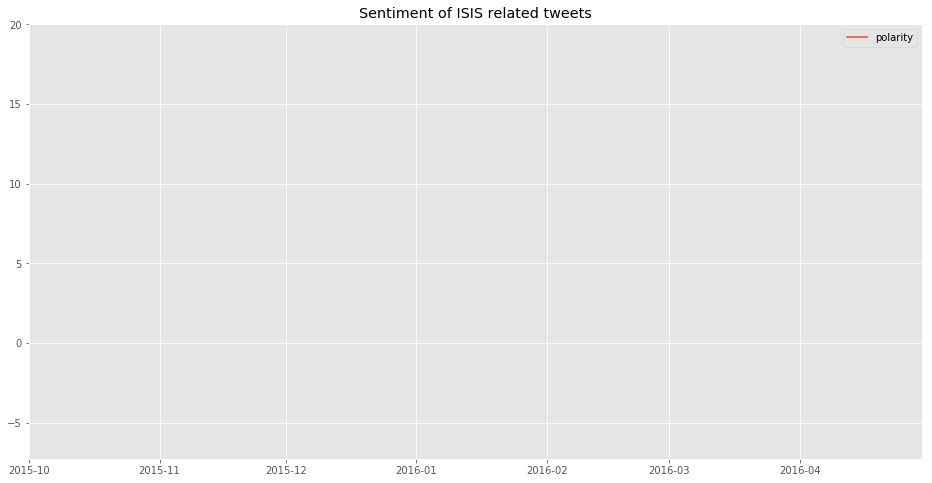

In [54]:
# Sentiment over time
# Tweets over time
polarity.plot(title='Sentiment of ISIS related tweets',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8))

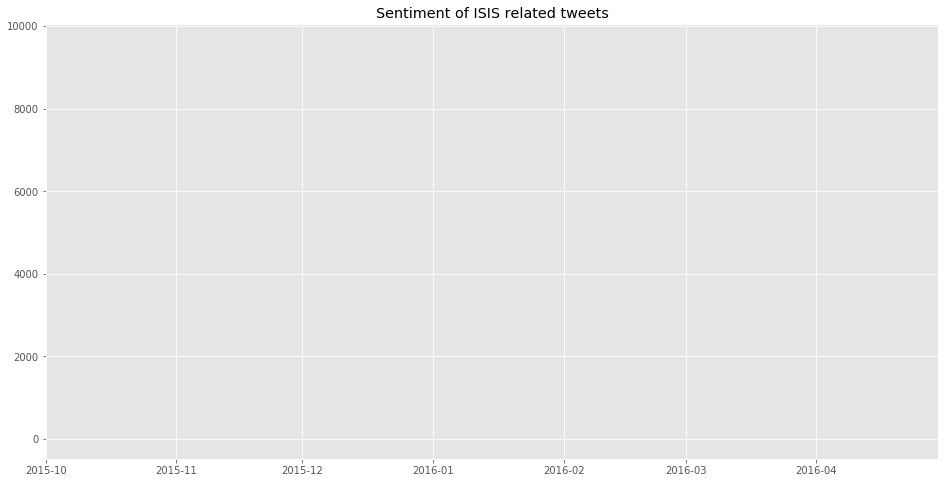

In [55]:
# Sentiment by user

# Top 10 users
top10_users = data[data.username.isin(data.username.value_counts()[:10].keys().tolist())]

# How do I get the average by user?
data.polarity.value_counts().plot(title='Sentiment of ISIS related tweets',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8))

#pd.crosstab(top10_users.username, top10_users.polarity).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

**Deepmoji **

In [54]:
## clone the repository
! git clone https://github.com/huggingface/torchMoji.git

fatal: destination path 'torchMoji' already exists and is not an empty directory.


In [55]:
## download the pretrain# navigate to the torchmoji folder
! torchMoji/scripts/download_weights.py

'torchMoji' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
# navigate to the torchmoji folder
import os
#os.chdir('torchMoji')
## install dependencies
! pip install -e .

Directory '.' is not installable. File 'setup.py' not found.


In [57]:
# add to sys.path
import sys
base_path = '' # change if you have downloaded folder elsewhere.
#base_path = '/mnt/b0c8e396-e5ba-4614-be6f-146c4c861ab3/torchMoji/' ## path to the torchmoji directory
#sys.path.insert(0, base_path)


In [58]:
## Load model and tokenizer
from torchmoji.sentence_tokenizer import SentenceTokenizer
# load the deepmoji encoder that transforms text to emojies.
from torchmoji.model_def import torchmoji_emojis
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
import json,csv, numpy as np
import warnings; warnings.simplefilter('ignore')


## set the max context length
max_token = 30 ## This will not work for longer texts,
################# here you should consider splitting each text into smaller segments.

# Load vocab (i.e. the index of each word in the vector representation)
with open(VOCAB_PATH, 'r') as f:
    vocabulary = json.load(f)

# initialize tokenizer
sentence_tokenizer = SentenceTokenizer(vocabulary, max_token)
# load model
model = torchmoji_emojis(PRETRAINED_PATH)

ModuleNotFoundError: No module named 'torchmoji'

In [59]:
with open(base_path+'data/emoji_codes.json') as f:
    emoji_desc = json.load(f)
list(emoji_desc.items())[0:10]

FileNotFoundError: [Errno 2] No such file or directory: 'data/emoji_codes.json'

In [60]:
import emoji
def translate_emoji(emoji_descr):
    if emoji_descr in emoji.unicode_codes.EMOJI_ALIAS_UNICODE:
        return emoji.unicode_codes.EMOJI_ALIAS_UNICODE[emoji_descr]
    if emoji_descr in emoji.unicode_codes.EMOJI_UNICODE:
        return emoji.unicode_codes.EMOJI_UNICODE[emoji_descr]
    return emoji_descr
to_emoji = [translate_emoji(desc) for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]
to_emoji_desc = [desc for i,desc in sorted(emoji_desc.items(),key=lambda x: int(x[0]))]

## index 
to_emoji[0],to_emoji_desc[0]

ModuleNotFoundError: No module named 'emoji'

**4. Topic Modeling**

**Basic Models **

In [92]:
# NOTE: tfv is defined earlier under wordcloud
nmf = NMF(n_components=10).fit(tfv)
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("")

Topic #0:
syria assad aleppo russia ypg turkey rebels breakingnews ramiallolah myra

Topic #1:
state islamic islamic state state fighters fighters state forces fighting forces fighting islamic breaking islamic

Topic #2:
nid nid gazaui gazaui gazaui breaking aleppo breaking rebels captured saa huge

Topic #3:
isis iraq ramiallolah iraq army usa attack mosul army aamaq claims

Topic #4:
islamicstate amaqagency breaking fighters breaking islamicstate forces amaqagency islamicstate city islamicstate fighters martyrdom

Topic #5:
scotsmaninfidel sassysassyred ele7vn spicylatte123 1_texanna kafirkaty sassysassyred scotsmaninfidel kafirkaty ele7vn scotsmaninfidel 1_texanna jailamx

Topic #6:
killed soldiers today soldiers killed airstrikes iraqi civilians killed today iraqi soldiers russian

Topic #7:
al nusra qaeda al qaeda ahrar islam sham al nusra abu jabhat

Topic #8:
army sinai egyptian ied egyptian army explosion ied explosion targeted sheikh zuwaid

Topic #9:
allah akhi jazak accept a

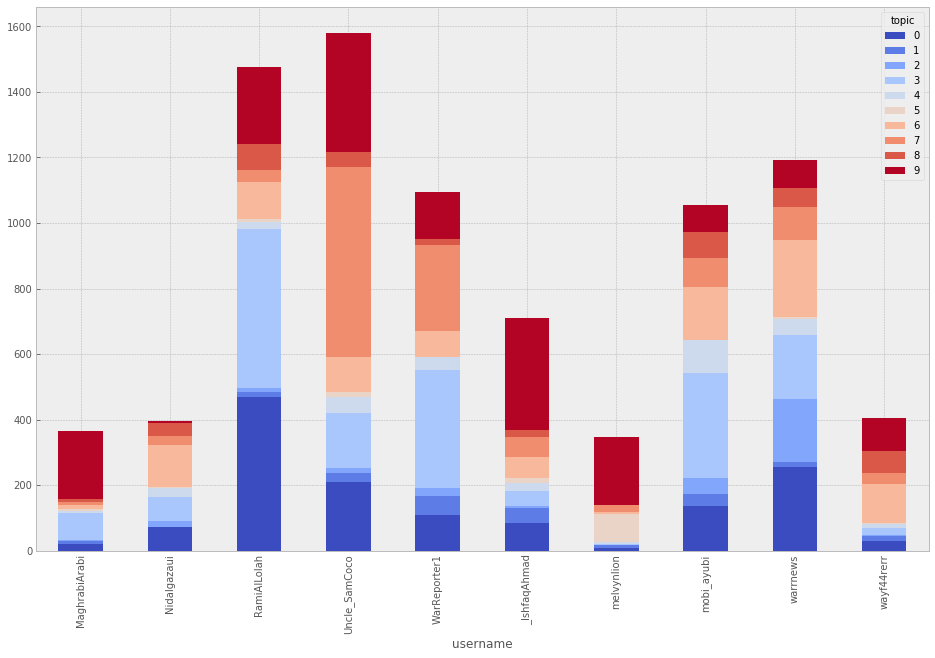

In [93]:
style.use('bmh')

data['topic'] = np.argmax(nmf.transform(vec.transform(tweets)), axis=1)
top10_users = data[data.username.isin(data.username.value_counts()[:10].keys().tolist())]
pd.crosstab(top10_users.username, top10_users.topic).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

**LDA **
- For references: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [ ]:
# Create a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use
dictionary = corpora.Dictionary(text_data)corpus = [dictionary.doc2bow(text) for text in text_data]

pickle.dump(corpus, open('corpus.pkl', 'wb'))

In [ ]:
# Find 10 topics in the data
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)